In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, get_scorer, make_scorer
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.svm import SVR
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV

In [2]:
weatherfootdata = pd.read_csv("./data_files/FootTrafficWeatherMelb2_20130101_20220701_v3.csv")

In [3]:
le = preprocessing.LabelEncoder()
weatherfootdata['rain_quality']=le.fit_transform(weatherfootdata['rain_quality'])
weatherfootdata['max_temp_quality']=le.fit_transform(weatherfootdata['max_temp_quality'])
weatherfootdata['min_temp_quality']=le.fit_transform(weatherfootdata['min_temp_quality'])
weatherfootdata['solar_exp']=le.fit_transform(weatherfootdata['solar_exp'])
weatherfootdata['date'] = pd.to_datetime(weatherfootdata['date'])
weatherfootdata['date']=weatherfootdata['date'].map(dt.datetime.toordinal)
weatherfootdata = weatherfootdata[weatherfootdata["total_rain"].notna()]
weatherfootdata = weatherfootdata[weatherfootdata["max_temp"].notna()]
weatherfootdata = weatherfootdata[weatherfootdata["min_temp"].notna()]
weatherfootdata

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,population_annual,population_change_annual,is_holiday,is_lockdown,OfflineRetail_Original_Turnover,OfflineRetail_Seasonally_Adjusted_Turnover,OfflineRetail_Trend_Turnover
0,738367,327383.0,0.0,0,14.7,1,4.3,1,34,6,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
1,738366,462115.0,0.0,0,13.0,1,2.1,1,99,5,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2,738365,405511.0,1.0,0,12.7,1,6.5,1,98,4,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
3,738364,334858.0,1.0,0,13.2,1,9.3,1,79,3,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
4,738363,340569.0,3.0,0,15.3,1,9.3,1,63,2,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,735025,263851.0,0.0,0,17.3,1,12.6,1,48,3,4217000,2.50,NaN,NaN,5154.2,5412.4,5411.8
3343,735024,251066.0,0.0,0,14.6,1,11.9,1,35,2,4217000,2.50,NaN,NaN,5154.2,5412.4,5411.8
3344,735023,245211.0,0.2,0,15.0,1,11.1,1,24,1,4217000,2.50,NaN,NaN,5154.2,5412.4,5411.8
3345,735022,238200.0,0.2,0,14.8,1,10.7,1,38,0,4217000,2.50,NaN,NaN,5154.2,5412.4,5411.8


In [4]:
y = weatherfootdata['total_people']
x = weatherfootdata[['date','total_rain', 'rain_quality', 'max_temp',
       'max_temp_quality', 'min_temp', 'min_temp_quality', 'solar_exp',
       'WeekDay', 'population_annual', 'population_change_annual']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

In [7]:
# Done on v3 of data
models = [LinearRegression(), linear_model.Lasso(max_iter=10000),  linear_model.Ridge(), SVR()]
cv = KFold(n_splits=5)
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Support Vector Regression"]
for model, name in zip(models, names):
    print(name)
    for score in ["neg_mean_absolute_error", "neg_root_mean_squared_error"]:
        print (score, names),
        print (cross_val_score(model, x, y, scoring=score, cv=cv).mean())

Linear Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Support Vector Regression']
-214551.01614776446
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Support Vector Regression']
-241418.54314970103
Lasso Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Support Vector Regression']
-214549.18129761488
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Support Vector Regression']
-241416.08630272685
Ridge Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Support Vector Regression']
-213486.79035432506
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Support Vector Regression']
-240300.21336664297
Support Vector Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Support Vecto

In [8]:
parameters = {'C':[1.5, 5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
model = SVR()
grid = GridSearchCV(estimator=model, param_grid=parameters, scoring = 'neg_root_mean_squared_error',cv=3, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

{'C': 10, 'epsilon': 0.1, 'gamma': 1e-07}


In [12]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
model = SVR()
grid = RandomizedSearchCV(model, parameters, scoring = 'neg_root_mean_squared_error',cv=3, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [15]:
# Lasso 
cv = KFold(n_splits=5)
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001])
model = linear_model.Lasso(max_iter=100000)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), scoring = 'neg_root_mean_squared_error',cv=cv)
grid.fit(X_train, y_train)
print(grid.best_estimator_.alpha)
print(grid.best_score_)

5.0
-174650.87527290004


In [16]:
# Ridge 
alphas = np.array([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,100,200])
model = linear_model.Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), scoring = 'neg_root_mean_squared_error',cv=cv)
grid.fit(X_train, y_train)
print(grid.best_estimator_.alpha)
print(grid.best_score_)

1
-174671.7741024637


In [44]:
# Ridge with 5 fold cross-validation

model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
ridge_best = linear_model.Ridge(alpha=model.alpha_)
print("Best Value Of Alpha: ", ridge_best.fit(X_train, y_train))
print(list(zip(ridge_best.coef_, x)))

Best Value Of Alpha:  Ridge(alpha=0.1)
[(-203.2542703775633, 'date'), (-1622.046487119943, 'total_rain'), (-3664.116056164092, 'rain_quality'), (13.538947809835216, 'max_temp'), (21765.5502421034, 'max_temp_quality'), (1656.4718275273092, 'min_temp'), (10752.57707175582, 'min_temp_quality'), (318.95197558348906, 'solar_exp'), (-4334.046504218691, 'WeekDay'), (1.228861943558214, 'population_annual'), (743285.3598379729, 'population_change_annual')]


In [13]:
# Best Value of Alpha for Ridge 
cv = KFold(n_splits=5)
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0], 
                "fit_intercept": [True, False], 
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

model = linear_model.Ridge()
grid = GridSearchCV(estimator=model, param_grid=params_Ridge, scoring = 'neg_root_mean_squared_error',cv=cv)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

-175034.96858123943
{'alpha': 1, 'fit_intercept': True, 'solver': 'svd'}


0, train 30104817610, test 27852424187
1, train 30110325324, test 27837330675
10, train 30473451159, test 28116495263
50, train 33029015091, test 30575715281
100, train 35009280182, test 32522027638
200, train 36859762156, test 34347724953
500, train 38542808111, test 36008188259


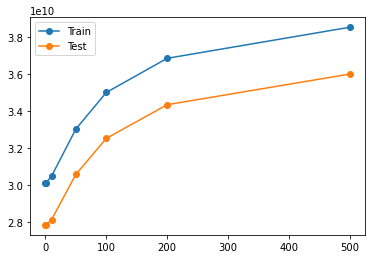

In [19]:
# the model is shown to overfit the training dataset at the cost of worse performance on the holdout dataset.

train_scores, test_scores = list(), list()
values = [0,1,10,50,100,200,500]
for i in values:
	model = linear_model.Ridge(alpha=i,solver='svd')
	model.fit(X_train, y_train)
	train_yhat = model.predict(X_train)
	train_mse = mean_squared_error(y_train, train_yhat)
	train_scores.append(train_mse)
	test_yhat = model.predict(X_test)
	test_mse = mean_squared_error(y_test, test_yhat)
	test_scores.append(test_mse)
	print('%d, train %d, test %d' % (i, train_mse, test_mse))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [37]:
math.sqrt(25768122121)

160524.52186815572